# STUDI KASUS PREDIKSI HARGA PANGAN
Disusun Oleh: Muchammad Malik

## Outline:
1. Data Understanding
2. Data Preparation / Pre-processing
3. Exploratory Data Analysis
4. Machine Learning Modelling and Model Evaluation
5. Price Forecasting
6. Kesimpulan dan Rekomendasi

## Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time
start_time = time.time()

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding

In [4]:
df = pd.read_excel('data_harga.xlsx')
# df = pd.read_excel('/kaggle/input/data-science-playground-harga-pangan-final/data_harga.xlsx')
df.head()

,Lokasi,Komoditas,Januari 2018,Februari 2018,Maret 2018,2018-04-01 00:00:00,Mei 2018,Juni 2018,Juli 2018,Agustus 2018,...,September 2022,Oktober 2022,November 2022,Desember 2022,Januari 2023,Februari 2023,Maret 2023,April 2023,Mei 2023,Juni 2023
0,Aceh,Bawang merah,30152.17,27000.0,NaN,33583.33,36500.00,37642.86,33250.00,NaN,...,33293.18,35219.05,35350.00,33140.91,35728.57,38397.5,34733.33,33123.68,34440.48,35452.94
1,Sumatera Utara,Bawang merah,25234.78,22675.0,22400.0,36795.24,35606.25,32800.00,29303.33,27150.0,...,33161.36,32557.14,31713.64,30845.45,33340.48,35045.0,32373.81,30131.58,30414.29,33005.88
2,Sumatera Barat,Bawang merah,22680.43,20650.0,NaN,33038.10,29364.29,24857.14,26384.38,NaN,...,28070.45,29221.43,28279.55,23209.09,30071.43,30315.0,29740.48,27218.42,29307.14,29361.76
3,Riau,Bawang merah,22826.09,21475.0,NaN,33938.10,29064.29,28608.33,26978.13,24150.0,...,31702.27,31747.62,30747.73,28029.55,32023.81,34390.0,31383.33,29557.89,31542.86,33855.88
4,Jambi,Bawang merah,19239.13,18000.0,NaN,33478.57,29531.25,24750.00,23281.25,23000.0,...,28886.36,30266.67,27965.91,26761.36,31952.38,31887.5,29571.43,26618.42,28261.90,30794.12


In [5]:
df_sample = pd.read_csv('sample.csv')
# df_sample = pd.read_csv('/kaggle/input/data-science-playground-harga-pangan-final/sample.csv')
df_sample.head()

,ID,Juli,Agustus,September
0,Aceh-Bawang merah,20000,20000,20000
1,Sumatera Utara-Bawang merah,20000,20000,20000
2,Sumatera Barat-Bawang merah,20000,20000,20000
3,Riau-Bawang merah,20000,20000,20000
4,Jambi-Bawang merah,20000,20000,20000


Kolom Lokasi dan Komiditas perlu disatukan menjadi Kolom ID

In [6]:
df.shape

(101, 68)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 68 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lokasi               101 non-null    object 
 1   Komoditas            101 non-null    object 
 2   Januari 2018         68 non-null     float64
 3   Februari 2018        68 non-null     float64
 4   Maret 2018           24 non-null     float64
 5   2018-04-01 00:00:00  100 non-null    float64
 6   Mei 2018             100 non-null    float64
 7   Juni 2018            101 non-null    float64
 8   Juli 2018            101 non-null    float64
 9   Agustus 2018         74 non-null     float64
 10  2018-09-01 00:00:00  101 non-null    float64
 11  Oktober 2018         101 non-null    float64
 12  2018-11-01 00:00:00  101 non-null    float64
 13  Desember 2018        101 non-null    float64
 14  Januari 2019         101 non-null    float64
 15  Februari 2019        101 non-null    flo

In [8]:
pd.set_option('display.max_rows', None)
print(df.isnull().sum().sort_values(ascending = False).head(10))
pd.reset_option('display.max_rows')

2019-09-01 00:00:00    101
Maret 2018              77
Januari 2018            33
Februari 2018           33
Agustus 2018            27
Mei 2019                14
2018-04-01 00:00:00      1
Mei 2018                 1
Oktober 2021             0
Maret 2022               0
dtype: int64


### <b> Catatan:</b> 
1. Tipe data di tiap kolom sudah sesuai. Kolom Lokasi dan Komoditas bertipe data kategorikal, sedangkan sisanya (yang berhubungan dengan harga) sudah berupa numerik
<br>
2. Nama kolom masih tidak beraturan. Ada yang nama kolom nya 'Maret 2018', ada pula yang '2018-04-01 00:00:00'
<br> <b>Tindak Lanjut:</b> Format Nama Kolom perlu di-sinkronisasi
<br>
3. Terdapat 8 kolom yang memiliki missing value. Nilai missing data terbanyak berada pada kolom bulan September 2019, yaitu seluruh data bernilai null. Adapun kolom dengan nilai null tersedikit terdapat pada kolom bulan April 2018 dan Mei 2018
<br> <b>Tindak Lanjut:</b> Nilai missing value perlu dilakukan imputation
4. Pada dataset df_sample, lokasi dan komoditas berada pada satu kolom, yaitu kolom ID
<br> <b>Tindak Lanjut:</b> Perlu ada penggabungan kolom Lokasi dan kolom Komoditas menjadi Kolom ID
5. Untuk data timeseries, data tanggal / bulan perlu dijadikan index, sedangkan pada dataset, data bulan malah dijadikan kolom
<br> <b>Tindak Lanjut:</b> Kolom Bulan dijadikan index

# 2. Data Preparation / Preprocessing

Berdasarkan catatan dari data understanding, beberapa proses yang diperlukan pada tahap ini adalah sebagai berikut:
- Sinkronisasi Format Nama Kolom
- Imputation Missing Value
- Ganti Lokasi dan Komoditas menjadi Kolom ID
- Kolom Bulan dijadikan index

## 2.1 Sinkronisasi nama Kolom

In [9]:
kolom_baru = []
for col in range(0,len(df.columns)):
    if (type(df.columns[col])!=str):
        kolom_baru.append(df.columns[col].strftime('%m-%Y'))
    else:
        kolom_baru.append(df.columns[col])
        
print(kolom_baru)

df.columns = kolom_baru
df.head(3)

['Lokasi', 'Komoditas', 'Januari 2018', 'Februari 2018', 'Maret 2018', '04-2018', 'Mei 2018', 'Juni 2018', 'Juli 2018', 'Agustus 2018', '09-2018', 'Oktober 2018', '11-2018', 'Desember 2018', 'Januari 2019', 'Februari 2019', 'Maret 2019', '04-2019', 'Mei 2019', 'Juni 2019', 'Juli 2019', 'Agustus 2019', '09-2019', 'Oktober 2019', '11-2019', 'Desember 2019', 'Januari 2020', 'Februari 2020', 'Maret 2020', '04-2020', 'Mei 2020', 'Juni 2020', 'Juli 2020', 'Agustus 2020', '09-2020', 'Oktober 2020', '11-2020', 'Desember 2020', 'Januari 2021', 'Februari 2021', 'Maret 2021', 'April 2021', 'Mei 2021', 'Juni 2021', 'Juli 2021', 'Agustus 2021', 'September 2021', 'Oktober 2021', 'November 2021', 'Desember 2021', 'Januari 2022', 'Februari 2022', 'Maret 2022', 'April 2022', 'Mei 2022', 'Juni 2022', 'Juli 2022', 'Agustus 2022', 'September 2022', 'Oktober 2022', 'November 2022', 'Desember 2022', 'Januari 2023', 'Februari 2023', 'Maret 2023', 'April 2023', 'Mei 2023', 'Juni 2023']


,Lokasi,Komoditas,Januari 2018,Februari 2018,Maret 2018,04-2018,Mei 2018,Juni 2018,Juli 2018,Agustus 2018,...,September 2022,Oktober 2022,November 2022,Desember 2022,Januari 2023,Februari 2023,Maret 2023,April 2023,Mei 2023,Juni 2023
0,Aceh,Bawang merah,30152.17,27000.0,NaN,33583.33,36500.00,37642.86,33250.00,NaN,...,33293.18,35219.05,35350.00,33140.91,35728.57,38397.5,34733.33,33123.68,34440.48,35452.94
1,Sumatera Utara,Bawang merah,25234.78,22675.0,22400.0,36795.24,35606.25,32800.00,29303.33,27150.0,...,33161.36,32557.14,31713.64,30845.45,33340.48,35045.0,32373.81,30131.58,30414.29,33005.88
2,Sumatera Barat,Bawang merah,22680.43,20650.0,NaN,33038.10,29364.29,24857.14,26384.38,NaN,...,28070.45,29221.43,28279.55,23209.09,30071.43,30315.0,29740.48,27218.42,29307.14,29361.76


In [10]:
df_kolom = df.columns.astype("string")
def proses_bulan(bulan):
    bulan = bulan.str.replace('Januari ','01-')
    bulan = bulan.str.replace('Februari ','02-')
    bulan = bulan.str.replace('Maret ','03-')
    bulan = bulan.str.replace('April ','04-')
    bulan = bulan.str.replace('Mei ','05-')
    bulan = bulan.str.replace('Juni ','06-')
    bulan = bulan.str.replace('Juli ','07-')
    bulan = bulan.str.replace('Agustus ','08-')
    bulan = bulan.str.replace('September ','09-')
    bulan = bulan.str.replace('Oktober ','10-')
    bulan = bulan.str.replace('November ','11-')
    bulan = bulan.str.replace('Desember ','12-')
    return bulan
df.columns = proses_bulan(df_kolom)
df.head()

,Lokasi,Komoditas,01-2018,02-2018,03-2018,04-2018,05-2018,06-2018,07-2018,08-2018,...,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023,04-2023,05-2023,06-2023
0,Aceh,Bawang merah,30152.17,27000.0,NaN,33583.33,36500.00,37642.86,33250.00,NaN,...,33293.18,35219.05,35350.00,33140.91,35728.57,38397.5,34733.33,33123.68,34440.48,35452.94
1,Sumatera Utara,Bawang merah,25234.78,22675.0,22400.0,36795.24,35606.25,32800.00,29303.33,27150.0,...,33161.36,32557.14,31713.64,30845.45,33340.48,35045.0,32373.81,30131.58,30414.29,33005.88
2,Sumatera Barat,Bawang merah,22680.43,20650.0,NaN,33038.10,29364.29,24857.14,26384.38,NaN,...,28070.45,29221.43,28279.55,23209.09,30071.43,30315.0,29740.48,27218.42,29307.14,29361.76
3,Riau,Bawang merah,22826.09,21475.0,NaN,33938.10,29064.29,28608.33,26978.13,24150.0,...,31702.27,31747.62,30747.73,28029.55,32023.81,34390.0,31383.33,29557.89,31542.86,33855.88
4,Jambi,Bawang merah,19239.13,18000.0,NaN,33478.57,29531.25,24750.00,23281.25,23000.0,...,28886.36,30266.67,27965.91,26761.36,31952.38,31887.5,29571.43,26618.42,28261.90,30794.12


## 2.2 Impute Missing Value

In [11]:
df.isnull().sum().sort_values(ascending = False).head(10)

09-2019    101
03-2018     77
01-2018     33
02-2018     33
08-2018     27
05-2019     14
04-2018      1
05-2018      1
10-2021      0
03-2022      0
dtype: int64

Seluruh data pada kolom 09-2019 adalah data kosong (missing value), sehingga kolom tersebut perlu ditangani secara khusus 

### Impute Missing Value selain kolom 09-2019

In [12]:
from sklearn.impute import KNNImputer

#Imputasi Kekosongan pada Bulan Jan-2018 s/d Mei-2018
df_impute_1 = df[['01-2018','02-2018','03-2018','04-2018','05-2018']]

imputer = KNNImputer(n_neighbors = 5)
df_impute_1 = imputer.fit_transform(df_impute_1)
df_impute_1 = pd.DataFrame(data=df_impute_1,columns=['01-2018','02-2018','03-2018','04-2018','05-2018'])

#Imputasi Kekosongan pada Bulan Agustus 2018
df_impute_2 = df[['07-2018','08-2018','09-2018']]

imputer = KNNImputer(n_neighbors = 5)
df_impute_2 = imputer.fit_transform(df_impute_2)
df_impute_2 = pd.DataFrame(data=df_impute_2,columns=['07-2018','08-2018','09-2018'])

#Imputasi Kekosongan pada Bulan Mei-2019
df_impute_3 = df[['04-2019','05-2019','06-2019']]

imputer = KNNImputer(n_neighbors = 5)
df_impute_3 = imputer.fit_transform(df_impute_3)
df_impute_3 = pd.DataFrame(data=df_impute_3,columns=['04-2019','05-2019','06-2019'])

In [13]:
#join the imputate data to dataframe
df[['01-2018','02-2018','03-2018','04-2018','05-2018']] = df_impute_1[['01-2018','02-2018','03-2018','04-2018','05-2018']]
df['08-2018'] = df_impute_2['08-2018']
df['05-2019'] = df_impute_3[['05-2019']]

#check null
df.isnull().sum().sort_values(ascending = False).head(10)

09-2019    101
Lokasi       0
07-2021      0
12-2021      0
11-2021      0
10-2021      0
09-2021      0
08-2021      0
06-2021      0
10-2020      0
dtype: int64

### Imputasi Kekosongan pada Bulan Sep-2019

In [14]:
df['09-2019'] = (df['08-2019']+df['10-2019'])/2

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 68 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lokasi     101 non-null    object 
 1   Komoditas  101 non-null    object 
 2   01-2018    101 non-null    float64
 3   02-2018    101 non-null    float64
 4   03-2018    101 non-null    float64
 5   04-2018    101 non-null    float64
 6   05-2018    101 non-null    float64
 7   06-2018    101 non-null    float64
 8   07-2018    101 non-null    float64
 9   08-2018    101 non-null    float64
 10  09-2018    101 non-null    float64
 11  10-2018    101 non-null    float64
 12  11-2018    101 non-null    float64
 13  12-2018    101 non-null    float64
 14  01-2019    101 non-null    float64
 15  02-2019    101 non-null    float64
 16  03-2019    101 non-null    float64
 17  04-2019    101 non-null    float64
 18  05-2019    101 non-null    float64
 19  06-2019    101 non-null    float64
 20  07-2019   

In [16]:
df.head(2)

,Lokasi,Komoditas,01-2018,02-2018,03-2018,04-2018,05-2018,06-2018,07-2018,08-2018,...,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023,04-2023,05-2023,06-2023
0,Aceh,Bawang merah,30152.17,27000.0,26990.0,33583.33,36500.00,37642.86,33250.00,29300.0,...,33293.18,35219.05,35350.00,33140.91,35728.57,38397.5,34733.33,33123.68,34440.48,35452.94
1,Sumatera Utara,Bawang merah,25234.78,22675.0,22400.0,36795.24,35606.25,32800.00,29303.33,27150.0,...,33161.36,32557.14,31713.64,30845.45,33340.48,35045.0,32373.81,30131.58,30414.29,33005.88


## 2.3 Mengganti Kolom Lokasi dan Komoditas menjadi Kolom ID

In [17]:
df['ID'] = df['Lokasi']+'-'+df['Komoditas']
df = df.drop(columns = ['Lokasi','Komoditas'])
column_order = ['ID'] + [column for column in df if column!='ID']
df = df[column_order]
df = df.set_index('ID')
df.head()

,01-2018,02-2018,03-2018,04-2018,05-2018,06-2018,07-2018,08-2018,09-2018,10-2018,...,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023,04-2023,05-2023,06-2023
ID,,,,,,,,,,,,,,,,,,,,,
Aceh-Bawang merah,30152.17,27000.0,26990.0,33583.33,36500.00,37642.86,33250.00,29300.0,26250.0,21000.0,...,33293.18,35219.05,35350.00,33140.91,35728.57,38397.5,34733.33,33123.68,34440.48,35452.94
Sumatera Utara-Bawang merah,25234.78,22675.0,22400.0,36795.24,35606.25,32800.00,29303.33,27150.0,21362.5,21775.0,...,33161.36,32557.14,31713.64,30845.45,33340.48,35045.0,32373.81,30131.58,30414.29,33005.88
Sumatera Barat-Bawang merah,22680.43,20650.0,25360.0,33038.10,29364.29,24857.14,26384.38,24000.0,19225.0,15900.0,...,28070.45,29221.43,28279.55,23209.09,30071.43,30315.0,29740.48,27218.42,29307.14,29361.76
Riau-Bawang merah,22826.09,21475.0,25300.0,33938.10,29064.29,28608.33,26978.13,24150.0,20387.5,20025.0,...,31702.27,31747.62,30747.73,28029.55,32023.81,34390.0,31383.33,29557.89,31542.86,33855.88
Jambi-Bawang merah,19239.13,18000.0,21970.0,33478.57,29531.25,24750.00,23281.25,23000.0,19000.0,20200.0,...,28886.36,30266.67,27965.91,26761.36,31952.38,31887.5,29571.43,26618.42,28261.90,30794.12


## 2.4 Kolom nama bulan dijadikan index data

In [18]:
# df3.columns[1:] = pd.to_datetime(df3.columns[1:]).to_period('M')
df2 = df.copy()
df2.columns = df.columns[:1].tolist() + pd.to_datetime(df.columns[1:]).tolist()
df2.head()

,01-2018,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
ID,,,,,,,,,,,,,,,,,,,,,
Aceh-Bawang merah,30152.17,27000.0,26990.0,33583.33,36500.00,37642.86,33250.00,29300.0,26250.0,21000.0,...,33293.18,35219.05,35350.00,33140.91,35728.57,38397.5,34733.33,33123.68,34440.48,35452.94
Sumatera Utara-Bawang merah,25234.78,22675.0,22400.0,36795.24,35606.25,32800.00,29303.33,27150.0,21362.5,21775.0,...,33161.36,32557.14,31713.64,30845.45,33340.48,35045.0,32373.81,30131.58,30414.29,33005.88
Sumatera Barat-Bawang merah,22680.43,20650.0,25360.0,33038.10,29364.29,24857.14,26384.38,24000.0,19225.0,15900.0,...,28070.45,29221.43,28279.55,23209.09,30071.43,30315.0,29740.48,27218.42,29307.14,29361.76
Riau-Bawang merah,22826.09,21475.0,25300.0,33938.10,29064.29,28608.33,26978.13,24150.0,20387.5,20025.0,...,31702.27,31747.62,30747.73,28029.55,32023.81,34390.0,31383.33,29557.89,31542.86,33855.88
Jambi-Bawang merah,19239.13,18000.0,21970.0,33478.57,29531.25,24750.00,23281.25,23000.0,19000.0,20200.0,...,28886.36,30266.67,27965.91,26761.36,31952.38,31887.5,29571.43,26618.42,28261.90,30794.12


In [19]:
df_timeseries = df2.T
df_timeseries = pd.DataFrame(df_timeseries.values[1:])
df_timeseries.columns = df2.index
df_timeseries['Month'] = df2.columns[1:]
df_timeseries = df_timeseries.set_index('Month')
df_timeseries

ID,Aceh-Bawang merah,Sumatera Utara-Bawang merah,Sumatera Barat-Bawang merah,Riau-Bawang merah,Jambi-Bawang merah,Sumatera Selatan-Bawang merah,Bengkulu-Bawang merah,Lampung-Bawang merah,Bangka Belitung-Bawang merah,Kepulauan Riau-Bawang merah,...,Sulawesi Utara-Daging Ayam Ras,Sulawesi Tengah-Daging Ayam Ras,Sulawesi Selatan-Daging Ayam Ras,Sulawesi Tenggara-Daging Ayam Ras,Gorontalo-Daging Ayam Ras,Sulawesi Barat-Daging Ayam Ras,Maluku-Daging Ayam Ras,Maluku Utara-Daging Ayam Ras,Papua Barat-Daging Ayam Ras,Papua-Daging Ayam Ras
Month,,,,,,,,,,,,,,,,,,,,,
2018-02-01,27000.00,22675.00,20650.00,21475.00,18000.00,20500.00,20000.00,17250.00,25000.00,32000.00,...,27000.00,25250.00,24750.00,31950.00,28000.00,24000.00,33000.00,36000.00,45000.00,40000.00
2018-03-01,26990.00,22400.00,25360.00,25300.00,21970.00,25250.00,26990.00,21720.00,27670.00,26740.00,...,26090.00,25300.00,23620.00,27940.00,26740.00,21720.00,32560.00,32560.00,34120.00,34120.00
2018-04-01,33583.33,36795.24,33038.10,33938.10,33478.57,35800.00,38285.71,29188.10,38083.33,32428.57,...,27380.95,27095.24,25221.43,35121.43,28428.57,23333.33,39157.14,37752.38,38154.76,40000.00
2018-05-01,36500.00,35606.25,29364.29,29064.29,29531.25,37142.86,36875.00,29712.50,38812.50,29437.50,...,30428.57,30514.29,27757.14,35642.86,32000.00,24857.14,38162.50,38985.71,41428.57,40714.29
2018-06-01,37642.86,32800.00,24857.14,28608.33,24750.00,38050.00,36800.00,30957.14,40750.00,29678.57,...,34857.14,29000.00,29916.67,37912.50,33428.57,27142.86,43560.00,40142.86,43593.75,41428.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,38397.50,35045.00,30315.00,34390.00,31887.50,40550.00,41757.50,36417.50,45142.50,33755.00,...,30280.00,33355.00,26185.00,40070.00,27500.00,24900.00,39200.00,40242.50,45150.00,40667.50
2023-03-01,34733.33,32373.81,29740.48,31383.33,29571.43,36545.24,37911.90,30764.29,38216.67,30619.05,...,29952.38,31769.05,26797.62,40228.57,28309.52,25523.81,39045.24,44080.95,45333.33,39702.38
2023-04-01,33123.68,30131.58,27218.42,29557.89,26618.42,37734.21,35602.63,36171.05,35918.42,28797.37,...,30907.89,35847.37,28394.74,41678.95,28573.68,28052.63,38918.42,46331.58,45447.37,39715.79


In [20]:
df_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2018-02-01 to 2023-06-01
Columns: 101 entries, Aceh-Bawang merah to Papua-Daging Ayam Ras
dtypes: float64(101)
memory usage: 51.8 KB


# 3. Exploratory Data Analysis (EDA)

## 3.1 Perbandingan Tiga Komoditas di satu wilayah

<b> Sampel Wilayah Sumatra: Aceh </b>

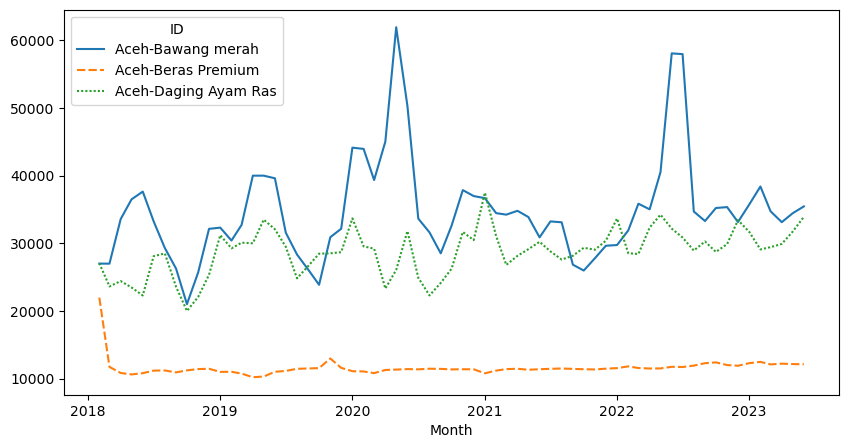

In [21]:
plt.figure(figsize=(10,5))
df_aceh = df_timeseries[['Aceh-Bawang merah','Aceh-Beras Premium','Aceh-Daging Ayam Ras']]
sns.lineplot(data=df_aceh)
plt.show()

<b> Sampel Wilayah Jawa: DKI Jakarta </b>

<AxesSubplot:xlabel='Month'>

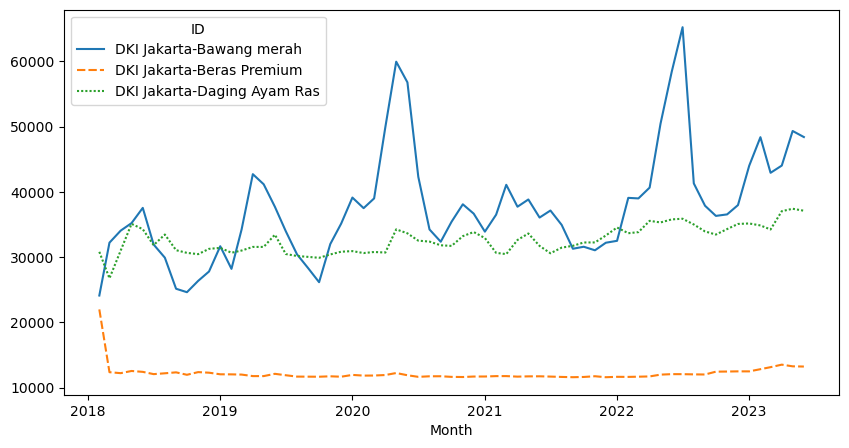

In [22]:
plt.figure(figsize=(10,5))
df_jakarta = df_timeseries[['DKI Jakarta-Bawang merah','DKI Jakarta-Beras Premium','DKI Jakarta-Daging Ayam Ras']]
sns.lineplot(data=df_jakarta)

<b> Sampel Wilayah Kalimantan: Kalimantan Timur </b>

<AxesSubplot:xlabel='Month'>

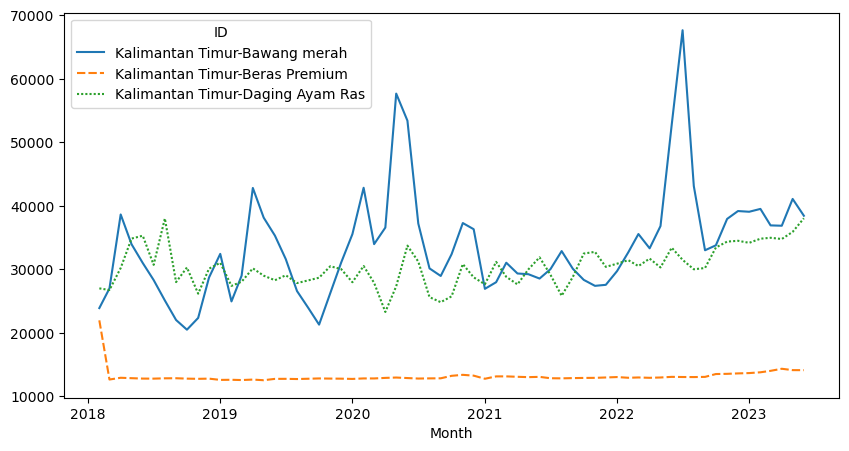

In [23]:
plt.figure(figsize=(10,5))
df_kaltim = df_timeseries[['Kalimantan Timur-Bawang merah','Kalimantan Timur-Beras Premium','Kalimantan Timur-Daging Ayam Ras']]
sns.lineplot(data=df_kaltim)

<b> Sampel Wilayah Indonesia Timur: Maluku </b>

<AxesSubplot:xlabel='Month'>

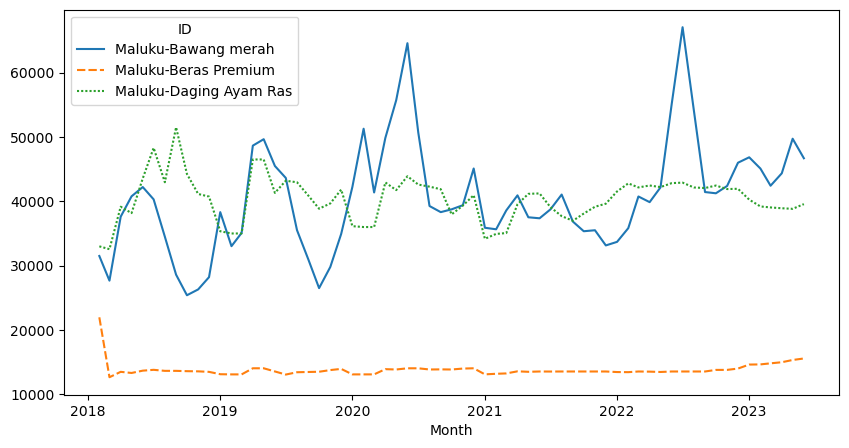

In [24]:
plt.figure(figsize=(10,5))
df_maluku = df_timeseries[['Maluku-Bawang merah','Maluku-Beras Premium','Maluku-Daging Ayam Ras']]
sns.lineplot(data=df_maluku)

### Insight:
Dari keseluruhan daerah, terlihat bahwa harga beras selalu lebih murah dibanding harga bawang merah dan harga daging ayam ras. Adapun harga daging merah terkadang lebih murah dibanding harga daging ayam ras, terkadang lebih mahal dibanding harga daging ayam ras. 

## 3.2 Perbandingan Harga Satu Komoditas di Berbagai Wilayah

In [25]:
df_bawang_sampel = df_timeseries[['Aceh-Bawang merah','Sumatera Selatan-Bawang merah','DKI Jakarta-Bawang merah','Jawa Timur-Bawang merah','Kalimantan Timur-Bawang merah','Sulawesi Utara-Bawang merah','Maluku-Bawang merah']]
df_beras_sampel = df_timeseries[['Aceh-Beras Premium','Sumatera Selatan-Beras Premium', 'DKI Jakarta-Beras Premium', 'Jawa Timur-Beras Premium','Kalimantan Timur-Beras Premium','Sulawesi Utara-Beras Premium','Maluku-Beras Premium']]
df_daging_sampel = df_timeseries[['Aceh-Daging Ayam Ras','Sumatera Selatan-Daging Ayam Ras', 'DKI Jakarta-Daging Ayam Ras', 'Jawa Timur-Daging Ayam Ras','Kalimantan Timur-Daging Ayam Ras','Sulawesi Utara-Daging Ayam Ras','Maluku-Daging Ayam Ras']]

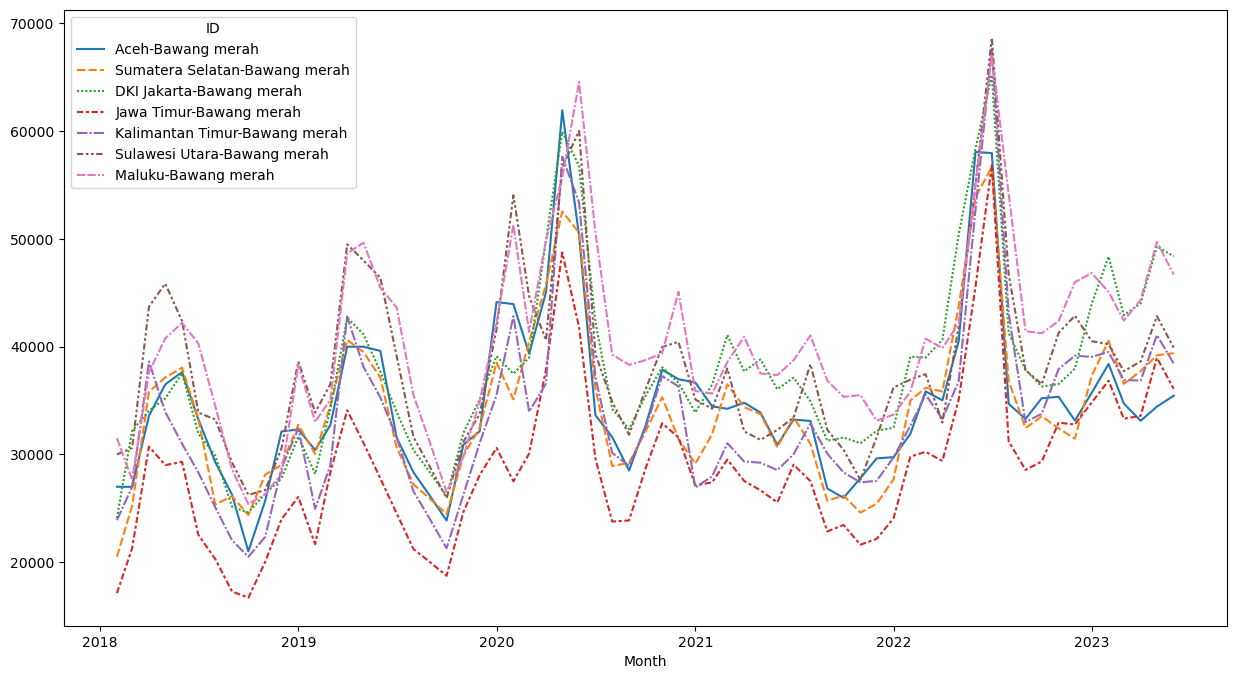

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_bawang_sampel)
plt.show()

<b> Insight: </b>
- Harga Bawang Merah dari berbagai daerah memiliki pola yang serupa, yaitu sama-sama memiliki harga tertinggi di pertengahan tahun 2020 dan 2022. 
- Adapun wilayah dengan harga tertinggi berada pada daerah Indonesia Timur (diwakili Sulut dan Maluku) sedangkan harga terendah berada di daerah Jawa Timur

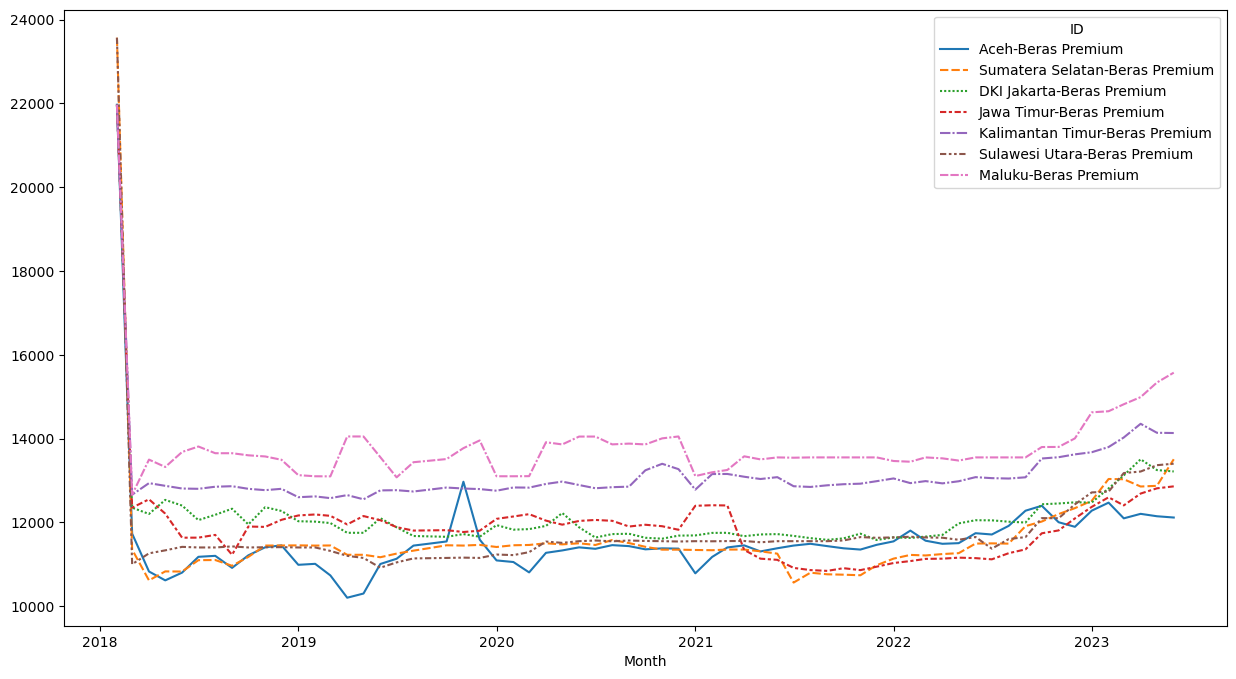

In [27]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_beras_sampel)
plt.show()

<b> Insight: </b>
- Harga Beras Premium dari berbagai daerah sama-sama memiliki pola menurun drastis pada tahun 2018, lalu cenderung datar sampai tahun 2023, dan mengalami peningkatan di 2023 akhir. 
- Adapun wilayah dengan harga tertinggi berada pada daerah Maluku dan Kaltim sedangkan harga terendah berada di daerah Aceh
- Khusus data beras, terdapat anomali (outlier) harga di titik awal, tepatnya pada bulan Feb 2018, dimana harga sangat jauh lebih tinggi dibandingkan harga sesudahnya. <b> Karena adanya anomali ini, maka saat permodelan Machine Learning untuk prediksi harga beras, row pertama (Feb 2018) tidak masuk dalam data training </b>

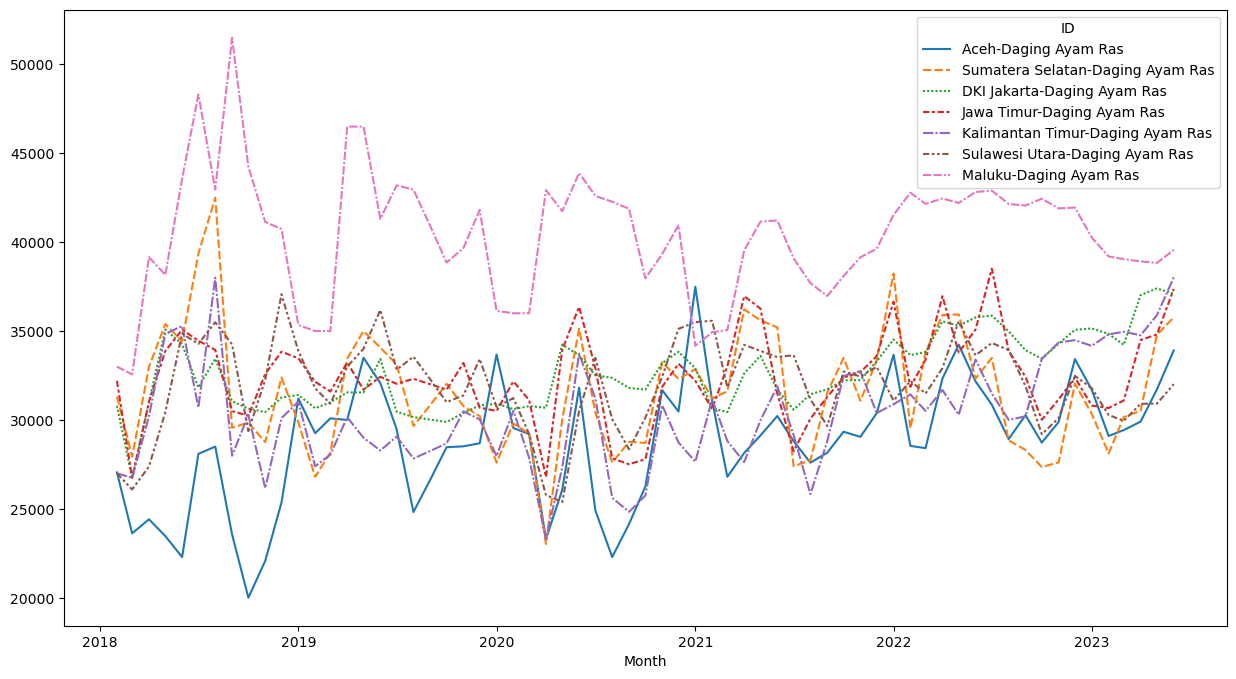

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_daging_sampel)
plt.show()

<b> Insight: </b>
- Harga Beras Premium dari berbagai daerah sama-sama memiliki pola yang serupa, kecuali daerah Maluku. 
- Daerah Maluku memiliki pola yang sedikit berbeda, namun harganya tetap tertinggi dibanding wilayah lain. 
- Adapun wilayah dengan harga terendah adalah wilayah Aceh

## KESIMPULAN EDA:
Secara garis besar, harga pangan di berbagai daerah memiliki pola yang mirip untuk komoditas yang sama. Komoditas yang berbeda akan memiliki pola yang sangat berbeda. 

Oleh karena itu, untuk prediksi harga pangan, <b> perlu dibuat tiga model machine learning</b>, diantaranya: 
- Satu model untuk prediksi harga bawang merah, 
- Satu model untuk prediksi harga beras premium, dan 
- Satu model untuk prediksi harga daging ayam ras. 

Khusus untuk prediksi harga beras, row pertama tidak masuk data training, karena nilainya merupakan outlier.

# 4. Machine Learning Modelling and Model Evaluation

## 4.1 Model Untuk Prediksi Komoditas Harga Bawang Merah

In [29]:
# !pip install pmdarima

In [30]:
df_1_Bawang = pd.DataFrame(df_timeseries['Aceh-Bawang merah'])

#Split dataset train:test = 80:20
df_1_Bawang_train = df_1_Bawang.loc[df_1_Bawang.index <= '2022-05-31']
df_1_Bawang_test = df_1_Bawang.loc[df_1_Bawang.index >= '2022-06-01']
df_1_Bawang

,Aceh-Bawang merah
Month,
2018-02-01,27000.00
2018-03-01,26990.00
2018-04-01,33583.33
2018-05-01,36500.00
2018-06-01,37642.86
...,...
2023-02-01,38397.50
2023-03-01,34733.33
2023-04-01,33123.68


### Percobaan dengan Model Auto-Arima

 ARIMA(1,0,1)(0,0,0)[0] intercept
mae - auto: 4175.7515
mape - auto: 0.0864
rmse - auto: 7492.3295


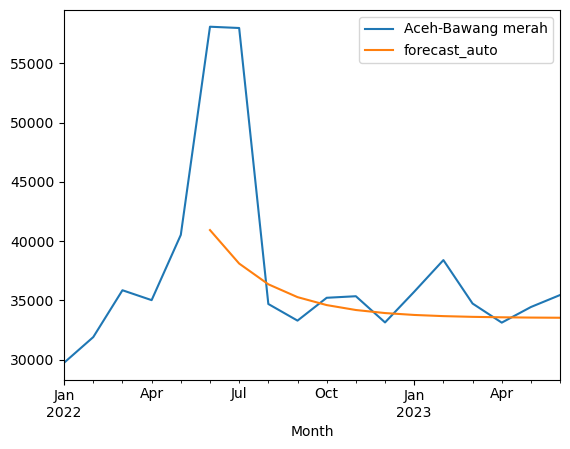

Wall time: 977 ms


In [31]:
%%time

import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

#auto-fit ARIMA
auto_arima = pm.auto_arima(df_1_Bawang_train)
print(auto_arima)

forecast_auto = auto_arima.predict(len(df_1_Bawang_test))

#Auto-fit ARIMA metrics

mae = mean_absolute_error(df_1_Bawang_test, forecast_auto)
mape = mean_absolute_percentage_error(df_1_Bawang_test, forecast_auto)
rmse = np.sqrt(mean_squared_error(df_1_Bawang_test, forecast_auto))

print(f'mae - auto: {round(mae,4)}')
print(f'mape - auto: {round(mape,4)}')
print(f'rmse - auto: {round(rmse,4)}')

#plot forecasting
df_plot = df_1_Bawang.iloc[-18:]
df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
df_plot
df_plot.plot()
plt.show()

Hasil Auto-Arima kurang memuaskan, sehingga perlu dicoba alternatif lain, yaitu Manual ARIMA 

### Percobaan dengan Model Manual-Arima

In [32]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Bawang_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Bawang_test))
    
    df_plot = df_timeseries['Aceh-Bawang merah'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Bawang_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Bawang_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Bawang_test, forecast_test))
    
    return mae,mape,rmse
    
#Uji Coba Kombinasi Parameter Nilai P
pval = [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,60,70]
dval = [2]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(10)

Wall time: 1min 18s


,param,mae,mape,rsme
10,"(20, 2, 1)",4109.829031,0.088060,7052.372461
14,"(50, 2, 1)",4869.496139,0.108591,7517.064653
12,"(30, 2, 1)",4920.067126,0.108833,7627.228253
11,"(25, 2, 1)",5029.439200,0.112361,7710.665896
16,"(70, 2, 1)",5120.598151,0.109682,8755.875891
15,"(60, 2, 1)",5186.689805,0.111634,8727.396606
13,"(40, 2, 1)",5990.303757,0.140231,8263.905171
9,"(10, 2, 1)",7182.538354,0.169241,9381.521462
8,"(9, 2, 1)",7736.116609,0.186131,9483.096050
6,"(7, 2, 1)",8273.715502,0.201404,9801.040957


Model Terbaik adalah Model dengan nilai p = 20

In [33]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Bawang_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Bawang_test))
    
    df_plot = df_timeseries['Aceh-Bawang merah'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Bawang_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Bawang_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Bawang_test, forecast_test))
    
    return mae,mape,rmse
    
#Uji Coba Kombinasi Parameter Nilai D
pval = [20]
dval = [0,1,2,3,4,5]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(5)

Wall time: 10.9 s


,param,mae,mape,rsme
2,"(20, 2, 1)",4109.829031,0.088060,7052.372461
0,"(20, 0, 1)",4734.362102,0.100737,8119.962978
1,"(20, 1, 1)",5715.233666,0.128892,8519.907005
3,"(20, 3, 1)",34072.385308,0.960096,38686.263451
4,"(20, 4, 1)",111280.849067,3.183358,139123.893232


Model Terbaik adalah Model dengan nilai d = 2

In [34]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Bawang_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Bawang_test))
    
    df_plot = df_timeseries['Aceh-Bawang merah'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Bawang_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Bawang_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Bawang_test, forecast_test))
    
    return mae,mape,rmse
    
#Parameter combinations
pval = [20]
dval = [2]
qval = [0,1,2,3,4]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(5)

Wall time: 9.72 s


,param,mae,mape,rsme
0,"(20, 2, 0)",3939.951924,0.082591,7133.839784
1,"(20, 2, 1)",4109.829031,0.088060,7052.372461
2,"(20, 2, 2)",4136.095488,0.089022,7043.416453
4,"(20, 2, 4)",4369.912203,0.091891,7672.965119
3,"(20, 2, 3)",5554.981023,0.129447,7616.538149


Model Terbaik adalah Model dengan nilai q = 0

Maka dari itu, model ARIMA yang digunakan untuk <b> komoditas bawang merah </b> adalah ARIMA dengan <b> nilai (p,d,q) = (20,2,0)</b>

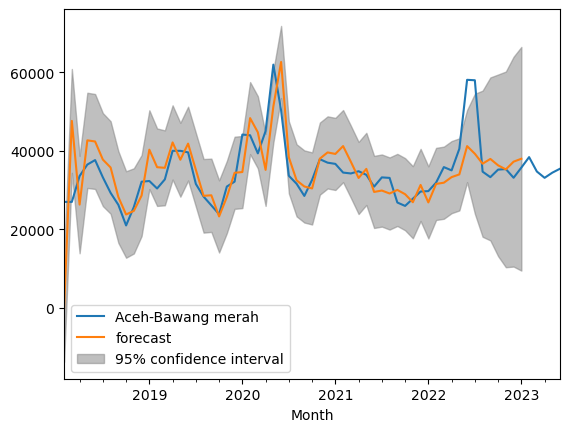

Wall time: 814 ms


In [35]:
%%time
manual_arima = ARIMA(df_1_Bawang_train, order=(20,2,0))
manual_arima_fit = manual_arima.fit()
    
#plot forecasting
forecast_manual = manual_arima_fit.predict(len(df_1_Bawang_test))
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = df_1_Bawang.plot(ax=ax)
plot_predict(manual_arima_fit,'2018','2023',ax=ax)
plt.show()

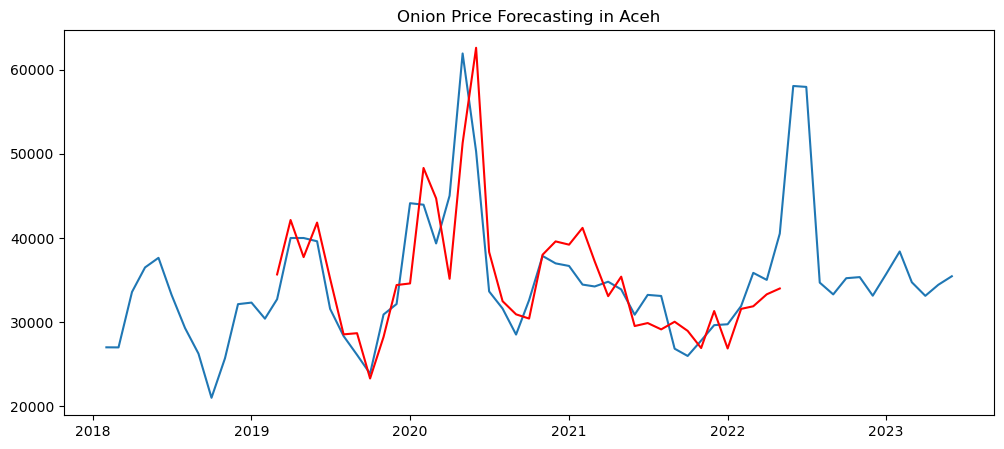

In [36]:
#Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(df_1_Bawang)
plt.plot(forecast_manual,color='red')
plt.title('Onion Price Forecasting in Aceh')
plt.show()

## 4.2 Model Untuk Prediksi Komoditas Harga Beras Premium

In [37]:
df_1_Beras = pd.DataFrame(df_timeseries['Aceh-Beras Premium'][1:])
#Split dataset train:test = 80:20
df_1_Beras_train = df_1_Beras.loc[df_1_Beras.index <= '2022-05-31']
df_1_Beras_test = df_1_Beras.loc[df_1_Beras.index >= '2022-06-01']

In [38]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Beras_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Beras_test))
    
    df_plot = df_timeseries['Aceh-Beras Premium'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Beras_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Beras_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Beras_test, forecast_test))
    
    return mae,mape,rmse
    
#Uji Coba Kombinasi Parameter Nilai P
pval = [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,60,70]
# pval = [50,60,70]
dval = [2]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(10)

Wall time: 1min 19s


,param,mae,mape,rsme
0,"(1, 2, 1)",443.849731,0.036419,486.723387
3,"(4, 2, 1)",448.292566,0.036773,491.964288
4,"(5, 2, 1)",449.067719,0.036844,491.834526
7,"(8, 2, 1)",452.774663,0.037244,480.656987
6,"(7, 2, 1)",455.550309,0.037374,498.461963
9,"(10, 2, 1)",475.674461,0.038991,551.625538
1,"(2, 2, 1)",486.234834,0.039924,526.034417
8,"(9, 2, 1)",500.248183,0.041033,555.518811
16,"(70, 2, 1)",503.584902,0.041363,570.063277
15,"(60, 2, 1)",524.675398,0.043112,583.236440


In [39]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Beras_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Beras_test))
    
    df_plot = df_timeseries['Aceh-Beras Premium'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Beras_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Beras_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Beras_test, forecast_test))
    
    return mae,mape,rmse
    
#Uji Coba Kombinasi Parameter Nilai P
pval = [1]
dval = [0,1,2,3,4,5]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(10)

Wall time: 323 ms


,param,mae,mape,rsme
2,"(1, 2, 1)",443.849731,0.036419,486.723387
1,"(1, 1, 1)",656.822223,0.053961,696.894746
0,"(1, 0, 1)",804.958904,0.066191,842.228606
3,"(1, 3, 1)",1365.931328,0.112240,1548.308619
4,"(1, 4, 1)",6094.768505,0.501122,8381.552885
5,"(1, 5, 1)",47513.824037,3.905962,67804.051301


In [40]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Beras_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Beras_test))
    
    df_plot = df_timeseries['Aceh-Beras Premium'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Beras_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Beras_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Beras_test, forecast_test))
    
    return mae,mape,rmse
    
#Uji Coba Kombinasi Parameter Nilai P
pval = [1]
dval = [2]
qval = [0,1,2,3,4,5]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(10)

Wall time: 465 ms


,param,mae,mape,rsme
4,"(1, 2, 4)",424.028931,0.034773,469.153234
5,"(1, 2, 5)",424.896063,0.034841,471.017893
3,"(1, 2, 3)",431.338895,0.035377,476.284058
0,"(1, 2, 0)",439.046598,0.036023,482.171203
2,"(1, 2, 2)",441.957885,0.036256,485.648799
1,"(1, 2, 1)",443.849731,0.036419,486.723387


Model Machine Learning yang digunakan untuk <b> komoditas beras premium </b> adalah ARIMA dengan nilai <b> (p,d,q) = (1,2,4) </b>

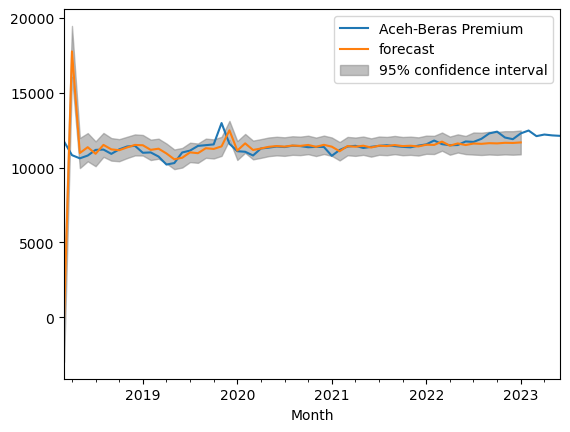

Wall time: 305 ms


In [41]:
%%time
manual_arima = ARIMA(df_1_Beras_train, order=(1,2,4))
manual_arima_fit = manual_arima.fit()
    
#plot forecasting
forecast_manual = manual_arima_fit.predict(len(df_1_Beras_test))
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = df_1_Beras.plot(ax=ax)
plot_predict(manual_arima_fit,'2018','2023',ax=ax)
plt.show()

## 4.3 Model Untuk Prediksi Komoditas Harga Daging Ayam Ras

In [42]:
df_1_Daging = pd.DataFrame(df_timeseries['Aceh-Daging Ayam Ras'])
#Split dataset train:test = 80:20
df_1_Daging_train = df_1_Daging.loc[df_1_Daging.index <= '2022-05-31']
df_1_Daging_test = df_1_Daging.loc[df_1_Daging.index >= '2022-06-01']

In [43]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Daging_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Daging_test))
    
    df_plot = df_timeseries['Aceh-Daging Ayam Ras'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Daging_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Daging_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Daging_test, forecast_test))
    
    return mae,mape,rmse
    
#Uji Coba Kombinasi Parameter Nilai P
pval = [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,60,70]
dval = [2]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(10)

Wall time: 1min 20s


,param,mae,mape,rsme
4,"(5, 2, 1)",1536.844258,0.050514,1725.001115
5,"(6, 2, 1)",1607.980207,0.053033,1824.094585
3,"(4, 2, 1)",1741.188634,0.057812,1951.566390
12,"(30, 2, 1)",4073.737092,0.134086,4476.231188
11,"(25, 2, 1)",4262.696458,0.140560,4705.203399
13,"(40, 2, 1)",4412.034544,0.146102,4950.888072
10,"(20, 2, 1)",4949.643649,0.162971,5442.646883
16,"(70, 2, 1)",5701.374019,0.188701,6451.667326
15,"(60, 2, 1)",6900.072865,0.227013,7502.003671
7,"(8, 2, 1)",7151.134086,0.235034,7492.747915


In [44]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Daging_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Daging_test))
    
    df_plot = df_timeseries['Aceh-Daging Ayam Ras'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Daging_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Daging_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Daging_test, forecast_test))
    
    return mae,mape,rmse
    
#Uji Coba Kombinasi Parameter Nilai P
pval = [5]
dval = [0,1,2,3,4,5]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(10)

Wall time: 1.02 s


,param,mae,mape,rsme
2,"(5, 2, 1)",1536.844258,0.050514,1725.001115
0,"(5, 0, 1)",2113.673248,0.066468,2730.831969
1,"(5, 1, 1)",2324.260281,0.077401,2561.131264
3,"(5, 3, 1)",2479.461050,0.081171,2894.369002
4,"(5, 4, 1)",15182.733122,0.492671,17518.204335
5,"(5, 5, 1)",74484.216793,2.395407,95747.334220


In [45]:
%%time

import warnings
warnings.filterwarnings('ignore')

#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_1_Daging_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_1_Daging_test))
    
    df_plot = df_timeseries['Aceh-Daging Ayam Ras'].iloc[-18:]
    df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)
    
    mae = mean_absolute_error(df_1_Daging_test, forecast_test)
    mape = mean_absolute_percentage_error(df_1_Daging_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_1_Daging_test, forecast_test))
    
    return mae,mape,rmse
    
#Uji Coba Kombinasi Parameter Nilai P
pval = [5]
dval = [2]
qval = [0,1,2,3,4,5]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(10)

Wall time: 1.33 s


,param,mae,mape,rsme
2,"(5, 2, 2)",1355.047152,0.044094,1602.176505
1,"(5, 2, 1)",1536.844258,0.050514,1725.001115
4,"(5, 2, 4)",1539.537886,0.050432,1754.544119
3,"(5, 2, 3)",1848.683717,0.060990,2038.720527
0,"(5, 2, 0)",1913.137748,0.063475,2139.905778
5,"(5, 2, 5)",5848.001514,0.192376,6132.496655


Model Machine Learning yang digunakan untuk <b> komoditas daging ayam ras </b> adalah ARIMA dengan nilai <b> (p,d,q) = (5,2,2) </b>

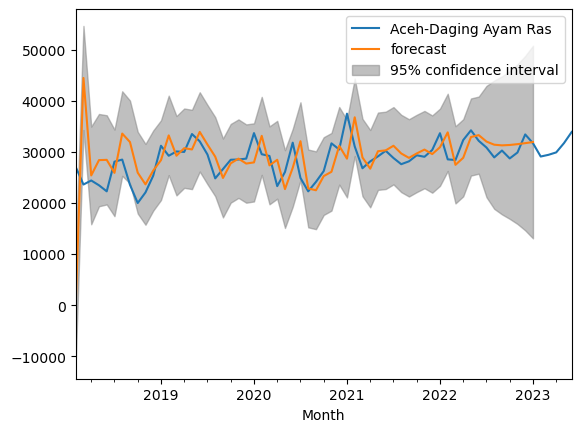

Wall time: 316 ms


In [46]:
%%time
manual_arima = ARIMA(df_1_Daging_train, order=(1,2,4))
manual_arima_fit = manual_arima.fit()
    
#plot forecasting
forecast_manual = manual_arima_fit.predict(len(df_1_Daging_test))
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = df_1_Daging.plot(ax=ax)
plot_predict(manual_arima_fit,'2018','2023',ax=ax)
plt.show()

# 5. Price Forecasting

In [47]:
kolom_bawang = df_timeseries.columns[0:34]
kolom_beras = df_timeseries.columns[34:67]
kolom_daging = df_timeseries.columns[67:102]
kolom_daging

Index(['Aceh-Daging Ayam Ras', 'Sumatera Utara-Daging Ayam Ras',
       'Sumatera Barat-Daging Ayam Ras', 'Riau-Daging Ayam Ras',
       'Jambi-Daging Ayam Ras', 'Sumatera Selatan-Daging Ayam Ras',
       'Bengkulu-Daging Ayam Ras', 'Lampung-Daging Ayam Ras',
       'Bangka Belitung-Daging Ayam Ras', 'Kepulauan Riau-Daging Ayam Ras',
       'DKI Jakarta-Daging Ayam Ras', 'Jawa Barat-Daging Ayam Ras',
       'Jawa Tengah-Daging Ayam Ras', 'D.I. Yogyakarta-Daging Ayam Ras',
       'Jawa Timur-Daging Ayam Ras', 'Banten-Daging Ayam Ras',
       'Bali-Daging Ayam Ras', 'Nusa Tenggara Barat-Daging Ayam Ras',
       'Nusa Tenggara Timur-Daging Ayam Ras',
       'Kalimantan Barat-Daging Ayam Ras', 'Kalimantan Tengah-Daging Ayam Ras',
       'Kalimantan Selatan-Daging Ayam Ras',
       'Kalimantan Timur-Daging Ayam Ras', 'Kalimantan Utara-Daging Ayam Ras',
       'Sulawesi Utara-Daging Ayam Ras', 'Sulawesi Tengah-Daging Ayam Ras',
       'Sulawesi Selatan-Daging Ayam Ras', 'Sulawesi Tenggara-Da

## 5.1 Prediksi Harga Bawang Merah

In [48]:
%%time
df_bawang = pd.DataFrame({'date':pd.date_range(start='2023-07-01',end='2023-09-01', freq='MS')})
df_bawang = df_bawang.set_index('date')

for i in kolom_bawang:
    df_ = df_timeseries[i]  
    model_baw = ARIMA(df_, order=(20,2,0))
    model_baw_fit = model_baw.fit()
    forecast_baw = model_baw_fit.forecast(3)
    df_bawang[i] = forecast_baw.values
    
df_bawang.head()

Wall time: 32 s


,Aceh-Bawang merah,Sumatera Utara-Bawang merah,Sumatera Barat-Bawang merah,Riau-Bawang merah,Jambi-Bawang merah,Sumatera Selatan-Bawang merah,Bengkulu-Bawang merah,Lampung-Bawang merah,Bangka Belitung-Bawang merah,Kepulauan Riau-Bawang merah,...,Sulawesi Utara-Bawang merah,Sulawesi Tengah-Bawang merah,Sulawesi Selatan-Bawang merah,Sulawesi Tenggara-Bawang merah,Gorontalo-Bawang merah,Sulawesi Barat-Bawang merah,Maluku-Bawang merah,Maluku Utara-Bawang merah,Papua Barat-Bawang merah,Papua-Bawang merah
date,,,,,,,,,,,,,,,,,,,,,
2023-07-01,31985.308132,35668.371157,31885.335868,34964.012276,30985.700297,32541.167486,39881.250182,31371.529761,41126.866289,32421.554266,...,40352.866412,35014.697354,34564.881748,34100.124697,37625.673172,32052.890008,43392.090100,58442.139358,55953.337076,49736.328684
2023-08-01,33373.291728,38461.874992,30417.214418,35144.077134,31350.455259,30489.530332,34148.582930,31895.793768,33254.984769,33144.761305,...,42081.263055,38282.251952,35697.840980,34794.874613,41184.872323,32566.971443,43608.654773,62229.072902,52947.305347,44951.126606
2023-09-01,30464.390713,33331.452898,26103.784651,32148.231145,26198.088564,31717.424476,33754.014753,31952.248998,38411.266095,34318.126807,...,41474.959147,42393.248389,37462.647462,35763.075573,38134.836050,36316.746917,43571.339096,62507.064638,54099.554090,47205.385894


## 5.2 Prediksi Harga Beras Premium

In [49]:
%%time
df_beras = pd.DataFrame({'date':pd.date_range(start='2023-07-01',end='2023-09-01', freq='MS')})
df_beras = df_beras.set_index('date')

for i in kolom_beras:
    df_ = df_timeseries[i][1:]  
    model_beras = ARIMA(df_, order=(1,2,4))
    model_beras_fit = model_beras.fit()
    forecast_beras = model_beras_fit.forecast(3)
    df_beras[i] = forecast_beras.values
    
df_beras.head()

Wall time: 4.69 s


,Aceh-Beras Premium,Sumatera Utara-Beras Premium,Sumatera Barat-Beras Premium,Riau-Beras Premium,Jambi-Beras Premium,Sumatera Selatan-Beras Premium,Bengkulu-Beras Premium,Lampung-Beras Premium,Bangka Belitung-Beras Premium,Kepulauan Riau-Beras Premium,...,Kalimantan Utara-Beras Premium,Sulawesi Utara-Beras Premium,Sulawesi Tengah-Beras Premium,Sulawesi Selatan-Beras Premium,Sulawesi Tenggara-Beras Premium,Sulawesi Barat-Beras Premium,Maluku-Beras Premium,Maluku Utara-Beras Premium,Papua Barat-Beras Premium,Papua-Beras Premium
date,,,,,,,,,,,,,,,,,,,,,
2023-07-01,12240.971888,13842.033232,16037.329549,14677.132600,13562.241837,13702.469671,13675.431098,12801.788326,13765.210451,13798.951318,...,14694.290293,13520.745189,12981.261835,12510.085163,14294.137502,12613.904717,15750.902202,16163.638165,14738.719397,15902.666525
2023-08-01,12233.337904,13883.330680,16103.018330,14755.621522,13456.333695,13869.102114,13707.040948,12723.831772,13829.835687,13814.801935,...,14801.035233,13589.498216,12999.451020,12532.549622,14648.144301,12629.733264,15910.838464,16703.281456,14747.960342,16134.349021
2023-09-01,12287.963538,13911.082936,16213.756312,14838.605835,13437.337674,13960.418554,13744.861493,12808.018798,13948.537000,13829.811202,...,14895.365144,13732.946778,13027.828561,12552.875628,14888.135706,12645.333492,16083.779348,17182.371146,14818.471238,16339.738198


## 5.3 Prediksi Harga Daging Ayam Ras

In [50]:
%%time
df_daging = pd.DataFrame({'date':pd.date_range(start='2023-07-01',end='2023-09-01', freq='MS')})
df_daging = df_daging.set_index('date')

for i in kolom_daging:
    df_ = df_timeseries[i]  
    model_daging = ARIMA(df_, order=(5,2,2))
    model_daging_fit = model_daging.fit()
    forecast_daging = model_daging_fit.forecast(3)
    df_daging[i] = forecast_daging.values
    
df_daging.head()

Wall time: 6.55 s


,Aceh-Daging Ayam Ras,Sumatera Utara-Daging Ayam Ras,Sumatera Barat-Daging Ayam Ras,Riau-Daging Ayam Ras,Jambi-Daging Ayam Ras,Sumatera Selatan-Daging Ayam Ras,Bengkulu-Daging Ayam Ras,Lampung-Daging Ayam Ras,Bangka Belitung-Daging Ayam Ras,Kepulauan Riau-Daging Ayam Ras,...,Sulawesi Utara-Daging Ayam Ras,Sulawesi Tengah-Daging Ayam Ras,Sulawesi Selatan-Daging Ayam Ras,Sulawesi Tenggara-Daging Ayam Ras,Gorontalo-Daging Ayam Ras,Sulawesi Barat-Daging Ayam Ras,Maluku-Daging Ayam Ras,Maluku Utara-Daging Ayam Ras,Papua Barat-Daging Ayam Ras,Papua-Daging Ayam Ras
date,,,,,,,,,,,,,,,,,,,,,
2023-07-01,33483.273280,40140.087355,37755.652119,35116.885237,34771.316722,35129.327554,37046.697496,37614.409684,40288.153373,39044.054452,...,31490.318117,37336.419876,33825.815579,40553.884276,27015.763888,33809.180331,40023.413097,44847.015983,45729.515296,40473.300592
2023-08-01,32896.113416,40321.324445,38192.394206,36408.421568,35354.271907,36665.167986,38563.211075,38461.830066,38939.121714,39226.876010,...,30484.507412,37509.302556,33793.155050,41176.955857,26840.377140,33518.889300,40389.794929,45762.489947,45709.266103,41824.486013
2023-09-01,32682.141164,41789.097210,39498.049846,38596.096691,35782.740048,38715.060355,39328.867105,39524.144196,38771.531022,39966.421823,...,30971.721359,37709.207060,33755.061334,40784.088280,26404.272604,35179.887259,40819.156529,46003.344815,45875.628025,42313.974892


## 5.4 Penggabungan Tiga DataFrame

In [51]:
sample_answer = pd.concat([df_bawang, df_beras,df_daging], axis=1)
sample_answer

,Aceh-Bawang merah,Sumatera Utara-Bawang merah,Sumatera Barat-Bawang merah,Riau-Bawang merah,Jambi-Bawang merah,Sumatera Selatan-Bawang merah,Bengkulu-Bawang merah,Lampung-Bawang merah,Bangka Belitung-Bawang merah,Kepulauan Riau-Bawang merah,...,Sulawesi Utara-Daging Ayam Ras,Sulawesi Tengah-Daging Ayam Ras,Sulawesi Selatan-Daging Ayam Ras,Sulawesi Tenggara-Daging Ayam Ras,Gorontalo-Daging Ayam Ras,Sulawesi Barat-Daging Ayam Ras,Maluku-Daging Ayam Ras,Maluku Utara-Daging Ayam Ras,Papua Barat-Daging Ayam Ras,Papua-Daging Ayam Ras
date,,,,,,,,,,,,,,,,,,,,,
2023-07-01,31985.308132,35668.371157,31885.335868,34964.012276,30985.700297,32541.167486,39881.250182,31371.529761,41126.866289,32421.554266,...,31490.318117,37336.419876,33825.815579,40553.884276,27015.763888,33809.180331,40023.413097,44847.015983,45729.515296,40473.300592
2023-08-01,33373.291728,38461.874992,30417.214418,35144.077134,31350.455259,30489.530332,34148.582930,31895.793768,33254.984769,33144.761305,...,30484.507412,37509.302556,33793.155050,41176.955857,26840.377140,33518.889300,40389.794929,45762.489947,45709.266103,41824.486013
2023-09-01,30464.390713,33331.452898,26103.784651,32148.231145,26198.088564,31717.424476,33754.014753,31952.248998,38411.266095,34318.126807,...,30971.721359,37709.207060,33755.061334,40784.088280,26404.272604,35179.887259,40819.156529,46003.344815,45875.628025,42313.974892


In [52]:
answer = sample_answer.T
answer = answer.astype('int')
answer

date,2023-07-01,2023-08-01,2023-09-01
Aceh-Bawang merah,31985,33373,30464
Sumatera Utara-Bawang merah,35668,38461,33331
Sumatera Barat-Bawang merah,31885,30417,26103
Riau-Bawang merah,34964,35144,32148
Jambi-Bawang merah,30985,31350,26198
...,...,...,...
Sulawesi Barat-Daging Ayam Ras,33809,33518,35179
Maluku-Daging Ayam Ras,40023,40389,40819
Maluku Utara-Daging Ayam Ras,44847,45762,46003
Papua Barat-Daging Ayam Ras,45729,45709,45875


In [55]:
#Nama Kolom dibuat mengikuti format data sampel dari panitia
df_answer = answer.reset_index()
df_answer.columns = ['ID','Juli','Agustus','September']

#tampilan tabel jawaban
pd.set_option('display.max_rows', None)
display(df_answer)
pd.reset_option('display.max_rows')

,ID,Juli,Agustus,September
0,Aceh-Bawang merah,31985,33373,30464
1,Sumatera Utara-Bawang merah,35668,38461,33331
2,Sumatera Barat-Bawang merah,31885,30417,26103
3,Riau-Bawang merah,34964,35144,32148
4,Jambi-Bawang merah,30985,31350,26198
5,Sumatera Selatan-Bawang merah,32541,30489,31717
6,Bengkulu-Bawang merah,39881,34148,33754
7,Lampung-Bawang merah,31371,31895,31952
8,Bangka Belitung-Bawang merah,41126,33254,38411
9,Kepulauan Riau-Bawang merah,32421,33144,34318


In [56]:
df_answer.to_csv('Hasil Prediksi_Muchammad Malik.csv', index=False)

# 6. Kesimpulan dan Rekomendasi

## 6.1 Kesimpulan

In [57]:
df_answer['Juni'] = df['06-2023'].values.astype('int')
df_answer = df_answer[['ID','Juni','Juli','Agustus','September']]
df_answer 

,ID,Juni,Juli,Agustus,September
0,Aceh-Bawang merah,35452,31985,33373,30464
1,Sumatera Utara-Bawang merah,33005,35668,38461,33331
2,Sumatera Barat-Bawang merah,29361,31885,30417,26103
3,Riau-Bawang merah,33855,34964,35144,32148
4,Jambi-Bawang merah,30794,30985,31350,26198
...,...,...,...,...,...
96,Sulawesi Barat-Daging Ayam Ras,34000,33809,33518,35179
97,Maluku-Daging Ayam Ras,39561,40023,40389,40819
98,Maluku Utara-Daging Ayam Ras,44505,44847,45762,46003
99,Papua Barat-Daging Ayam Ras,45544,45729,45709,45875


Hasil prediksi harga pangan cukup bervariasi. Ada yang harga bulan ini (Juni) merupakan harga termurah, ada yang bulan ini merupakan harga termahal. Begitu juga dengan bulan Juli, Agustus, dan September.

## 6.2 Rekomendasi

<b> Asumsi Permasalahan: </b> <br>
Diasumsikan bahwa sekarang adalah bulan Juni 2023, dan saat ini, perusahaan pangan di berbagai provinsi perlu memutuskan apakah perlu menyetok kebutuhan untuk tiga bulan kedepan (Juli-September) sebagai antisipasi kenaikan harga, atau cukup menyediakan stok untuk bulan ini saja, karena di bulan depan, harga diprediksi akan turun.

<b> Alternatif Solusi: </b> <br>
Harga pangan saat ini (bulan Juni) perlu dibandingkan dengan hasil forecast tiga bulan kedepan (Juli - September). Setelah dilakukan perbandingan, alternatif kebijakan yang dapat dipertimbangkan adalah sebagai berikut:
- Jika harga bulan Juni diprediksi lebih murah dibandingkan 3 bulan kedepan, maka bulan ini, perusahaan pangan di daerah terkait perlu membeli stok pangan bulan juni-september (belanja stok 4 bulan).
- Jika harga di bulan September diprediksi paling rendah dibanding bulan lainnya kecuali bulan Juni, maka bulan ini, perusahaan pangan perlu melakukan belanja stok bulan Juni-Agustus (belanja stok 3 bulan). 
- Jika harga bulan Agustus diprediksi paling murah dibanding bulan lainnya dan harga bulan Juni lebih rendah dibanding bulan Juli, maka perusahaan perlu membeli stok bulan Juni-Juli di bulan Juli (belanja stok 2 bulan)
- Jika harga bulan Juni diprediksi lebih tinggi dibanding bulan Juli, maka bulan ini, perusahaan cukup membeli stok bulan Juni saja (cukup belanja stok 1 bulan)

### Identifikasi pasangan komoditas-daerah yang bulan ini perlu menyediakan stok 4 bulan (Jun-Sep):

In [58]:
nyetok_empatbulan = df_answer[(df_answer['Juni']<df_answer['Juli'])&(df_answer['Juni']<df_answer['Agustus'])&(df_answer['Juni']<df_answer['September'])]
print('Sampel Daerah dan Komoditas:')
display(nyetok_empatbulan.reset_index().drop(columns='index').head(5))
print('List Daerah dan Komoditas:')
nyetok_empatbulan['ID'].values

Sampel Daerah dan Komoditas:


,ID,Juni,Juli,Agustus,September
0,Sumatera Utara-Bawang merah,33005,35668,38461,33331
1,Kepulauan Riau-Bawang merah,32397,32421,33144,34318
2,Kalimantan Timur-Bawang merah,38426,40513,43137,39427
3,Sulawesi Utara-Bawang merah,39897,40352,42081,41474
4,Aceh-Beras Premium,12114,12240,12233,12287


List Daerah dan Komoditas:


array(['Sumatera Utara-Bawang merah', 'Kepulauan Riau-Bawang merah',
       'Kalimantan Timur-Bawang merah', 'Sulawesi Utara-Bawang merah',
       'Aceh-Beras Premium', 'Sumatera Utara-Beras Premium',
       'Sumatera Barat-Beras Premium', 'Riau-Beras Premium',
       'Sumatera Selatan-Beras Premium', 'Bengkulu-Beras Premium',
       'Bangka Belitung-Beras Premium', 'Kepulauan Riau-Beras Premium',
       'DKI Jakarta-Beras Premium', 'Jawa Tengah-Beras Premium',
       'Jawa Timur-Beras Premium', 'Banten-Beras Premium',
       'Bali-Beras Premium', 'Kalimantan Barat-Beras Premium',
       'Kalimantan Tengah-Beras Premium',
       'Kalimantan Timur-Beras Premium', 'Kalimantan Utara-Beras Premium',
       'Sulawesi Utara-Beras Premium', 'Sulawesi Selatan-Beras Premium',
       'Sulawesi Tenggara-Beras Premium', 'Sulawesi Barat-Beras Premium',
       'Maluku-Beras Premium', 'Maluku Utara-Beras Premium',
       'Papua-Beras Premium', 'Sumatera Utara-Daging Ayam Ras',
       'Sumatera Barat-

### Identifikasi pasangan komoditas-daerah yang bulan ini perlu menyediakan stok 3 bulan (Jun - Agt):

In [59]:
nyetok_tigabulan = df_answer[(df_answer['September']<df_answer['Juni'])&(df_answer['September']<df_answer['Juli'])&(df_answer['September']<df_answer['Agustus'])&(df_answer['Juni']<df_answer['Juli'])&(df_answer['Juni']<df_answer['Agustus'])]
print('Sampel Daerah dan Komoditas:')
display(nyetok_tigabulan.reset_index().drop(columns='index').head(5))
print('List Daerah dan Komoditas:')
nyetok_tigabulan['ID'].values

Sampel Daerah dan Komoditas:


,ID,Juni,Juli,Agustus,September
0,Sumatera Barat-Bawang merah,29361,31885,30417,26103
1,Riau-Bawang merah,33855,34964,35144,32148
2,Jambi-Bawang merah,30794,30985,31350,26198


List Daerah dan Komoditas:


array(['Sumatera Barat-Bawang merah', 'Riau-Bawang merah',
       'Jambi-Bawang merah'], dtype=object)

### Identifikasi pasangan komoditas-daerah yang bulan ini perlu menyediakan stok 2 bulan (Jun - Jul):

In [60]:
nyetok_duabulan = df_answer[(df_answer['Agustus']<df_answer['Juli'])&(df_answer['Agustus']<df_answer['Juni'])&(df_answer['Agustus']<df_answer['September'])&(df_answer['Juli']>df_answer['Juni'])]
print('Sampel Daerah dan Komoditas:')
display(nyetok_duabulan.reset_index().drop(columns='index').head(5))
print('List Daerah dan Komoditas:')
nyetok_duabulan['ID'].values

Sampel Daerah dan Komoditas:


,ID,Juni,Juli,Agustus,September
0,Papua Barat-Bawang merah,55441,55953,52947,54099
1,Lampung-Beras Premium,12750,12801,12723,12808
2,Kalimantan Utara-Daging Ayam Ras,53961,54290,52946,53403


List Daerah dan Komoditas:


array(['Papua Barat-Bawang merah', 'Lampung-Beras Premium',
       'Kalimantan Utara-Daging Ayam Ras'], dtype=object)

### Identifikasi pasangan komoditas-daerah yang bulan ini cukup menyediakan stok 1 bulan (Juni saja):

In [61]:
nyetok_satubulan = df_answer[df_answer['Juni']>df_answer['Juli']]
print('Sampel Daerah dan Komoditas:')
display(nyetok_satubulan.reset_index().drop(columns='index').head(5))
print('List Daerah dan Komoditas:')
nyetok_satubulan['ID'].values

Sampel Daerah dan Komoditas:


,ID,Juni,Juli,Agustus,September
0,Aceh-Bawang merah,35452,31985,33373,30464
1,Sumatera Selatan-Bawang merah,39402,32541,30489,31717
2,Bengkulu-Bawang merah,41055,39881,34148,33754
3,Lampung-Bawang merah,38400,31371,31895,31952
4,Bangka Belitung-Bawang merah,45614,41126,33254,38411


List Daerah dan Komoditas:


array(['Aceh-Bawang merah', 'Sumatera Selatan-Bawang merah',
       'Bengkulu-Bawang merah', 'Lampung-Bawang merah',
       'Bangka Belitung-Bawang merah', 'DKI Jakarta-Bawang merah',
       'Jawa Barat-Bawang merah', 'Jawa Tengah-Bawang merah',
       'D.I. Yogyakarta-Bawang merah', 'Jawa Timur-Bawang merah',
       'Banten-Bawang merah', 'Bali-Bawang merah',
       'Nusa Tenggara Barat-Bawang merah',
       'Nusa Tenggara Timur-Bawang merah',
       'Kalimantan Barat-Bawang merah', 'Kalimantan Tengah-Bawang merah',
       'Kalimantan Selatan-Bawang merah', 'Kalimantan Utara-Bawang merah',
       'Sulawesi Tengah-Bawang merah', 'Sulawesi Selatan-Bawang merah',
       'Sulawesi Tenggara-Bawang merah', 'Gorontalo-Bawang merah',
       'Sulawesi Barat-Bawang merah', 'Maluku-Bawang merah',
       'Maluku Utara-Bawang merah', 'Papua-Bawang merah',
       'Jambi-Beras Premium', 'D.I. Yogyakarta-Beras Premium',
       'Nusa Tenggara Barat-Beras Premium',
       'Nusa Tenggara Timur-Beras Pre

In [64]:
end_time = time.time()
run_all_duration = end_time - start_time
print("Durasi Running Notebook: ",run_all_duration,"s")

Durasi Running Notebook:  387.4268686771393 s


# THE END